0
Early stopping at epoch 288


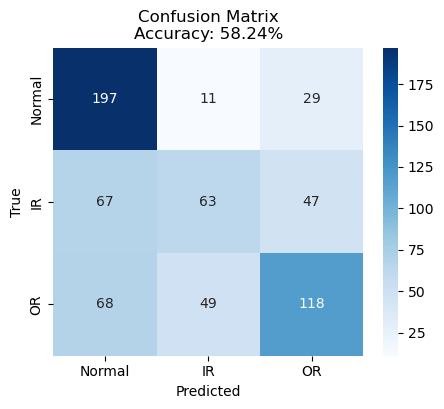

 - Model accuracy: 58.24%


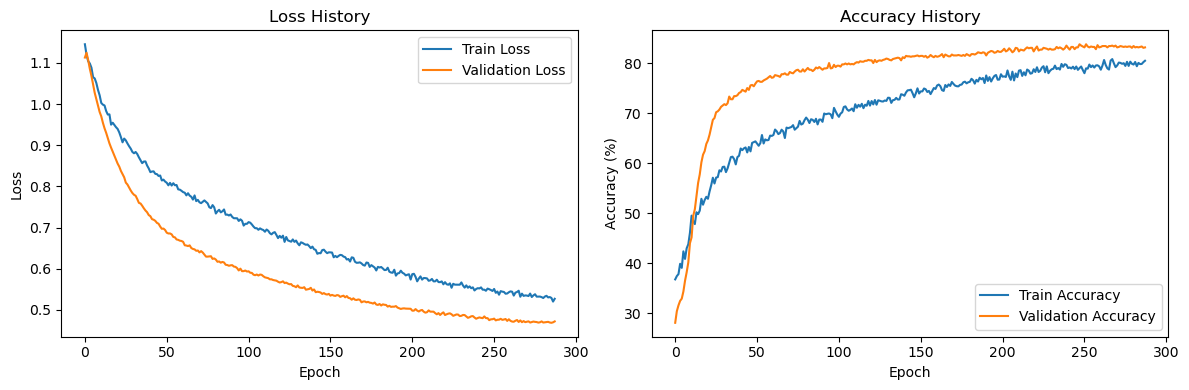

0
Early stopping at epoch 358


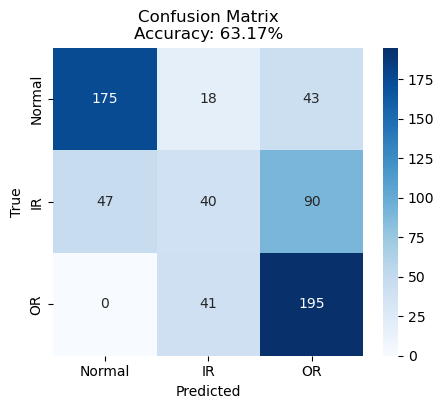

 - Model accuracy: 63.17%


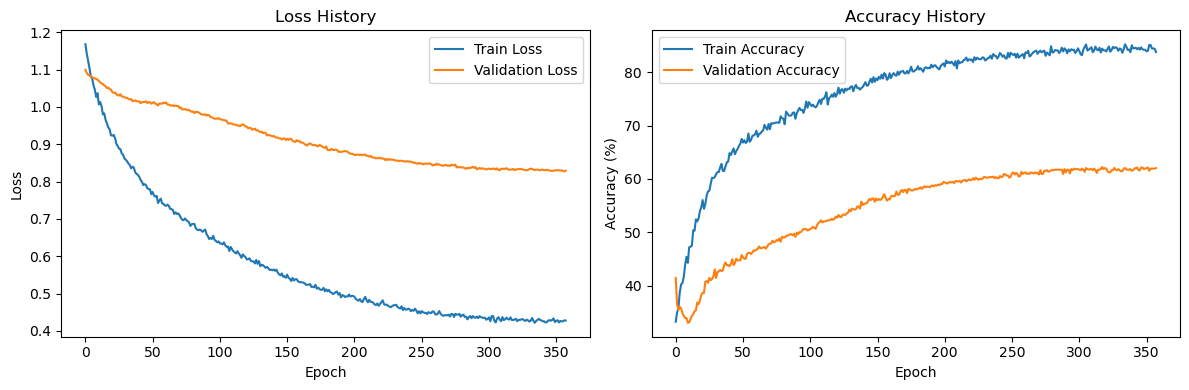

0
Early stopping at epoch 290


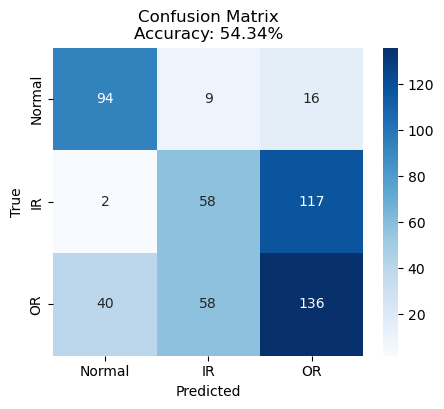

 - Model accuracy: 54.34%


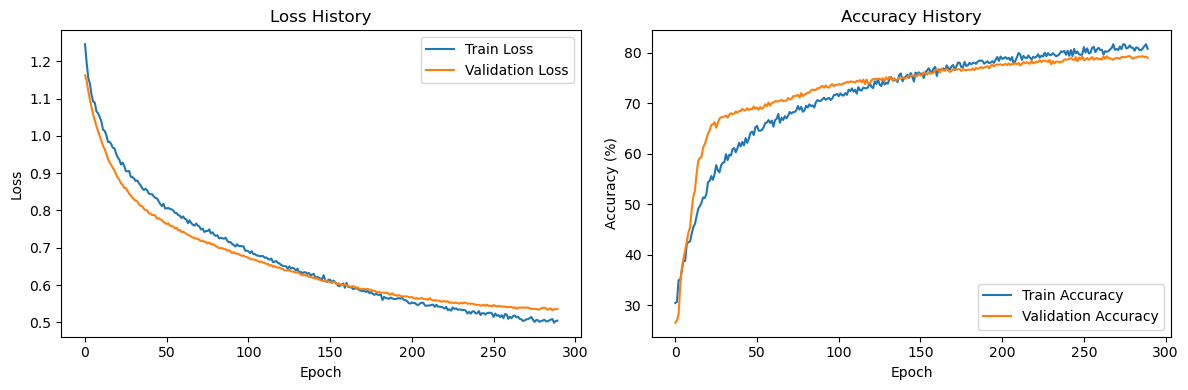

0
Early stopping at epoch 386


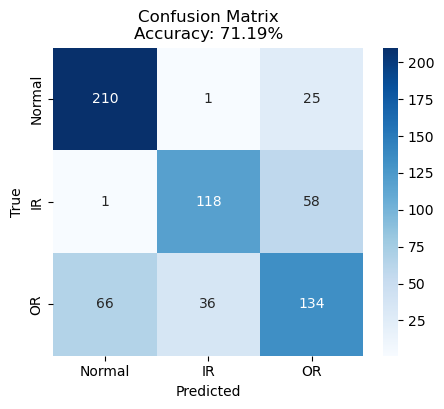

 - Model accuracy: 71.19%


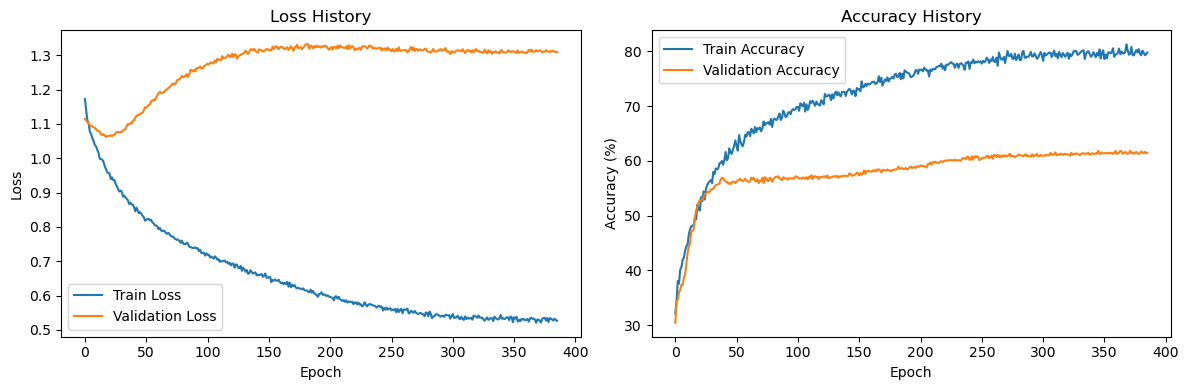

0
Early stopping at epoch 381


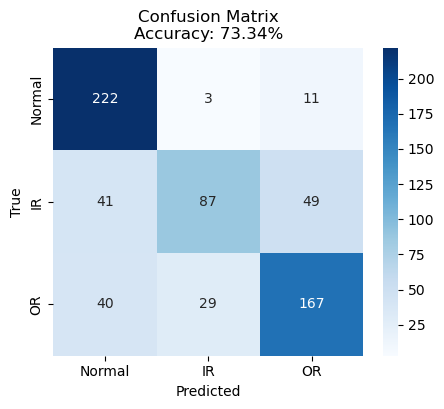

 - Model accuracy: 73.34%


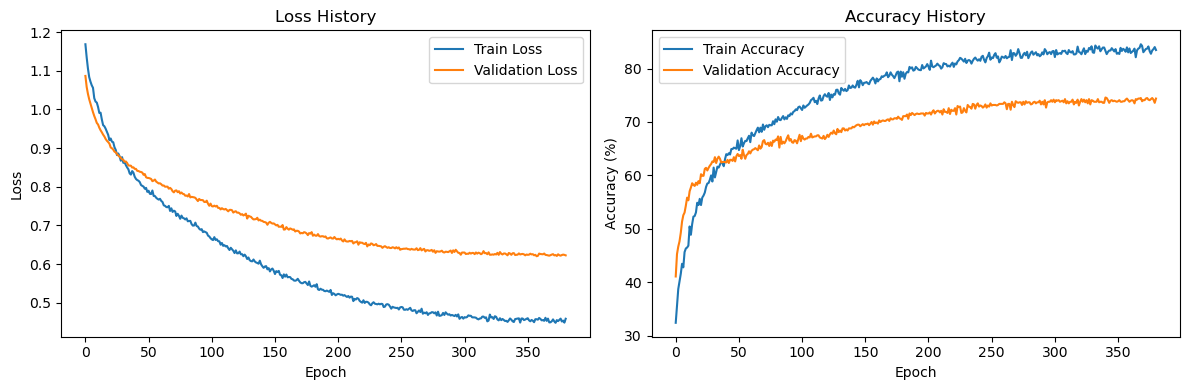

0
Early stopping at epoch 171


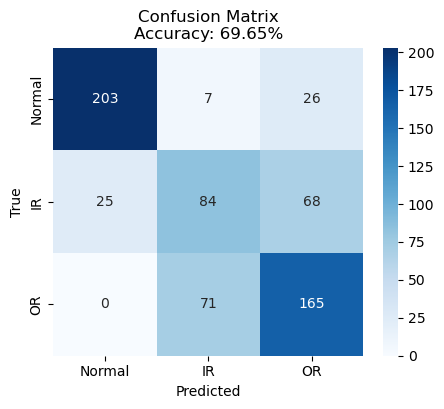

 - Model accuracy: 69.65%


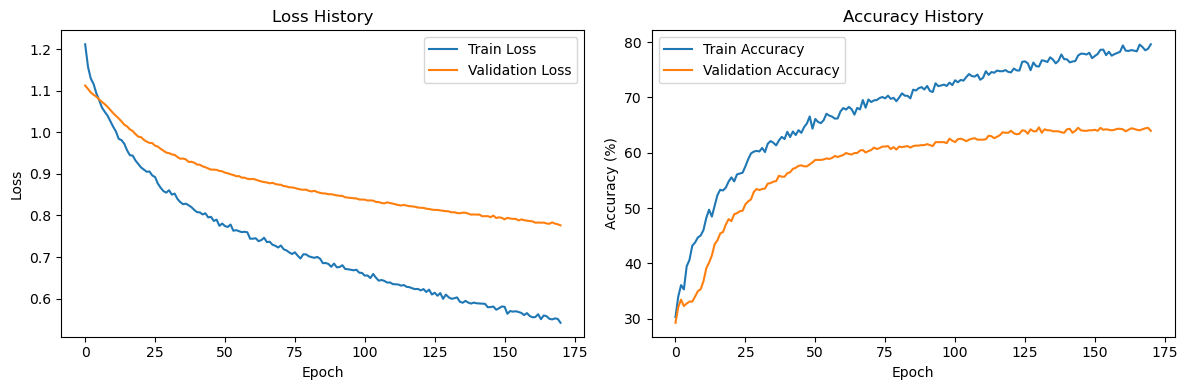

0


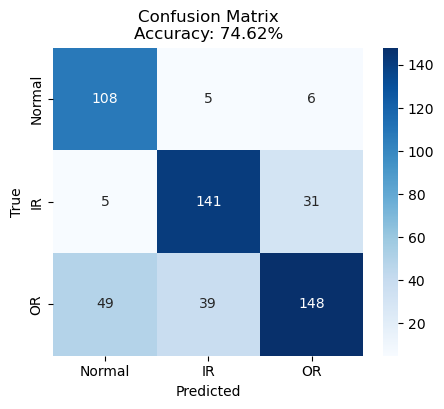

 - Model accuracy: 74.62%


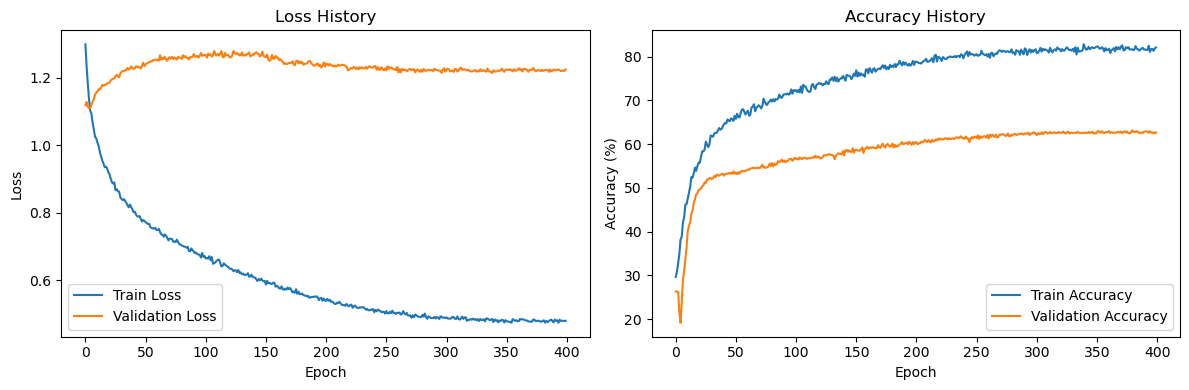

0
Early stopping at epoch 283


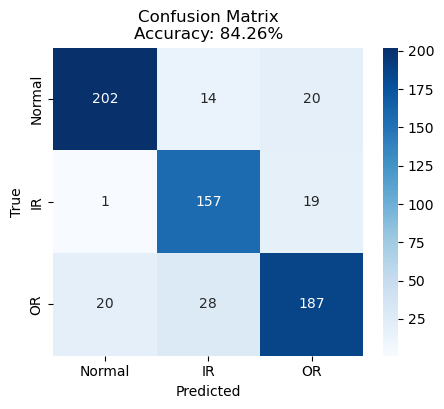

 - Model accuracy: 84.26%


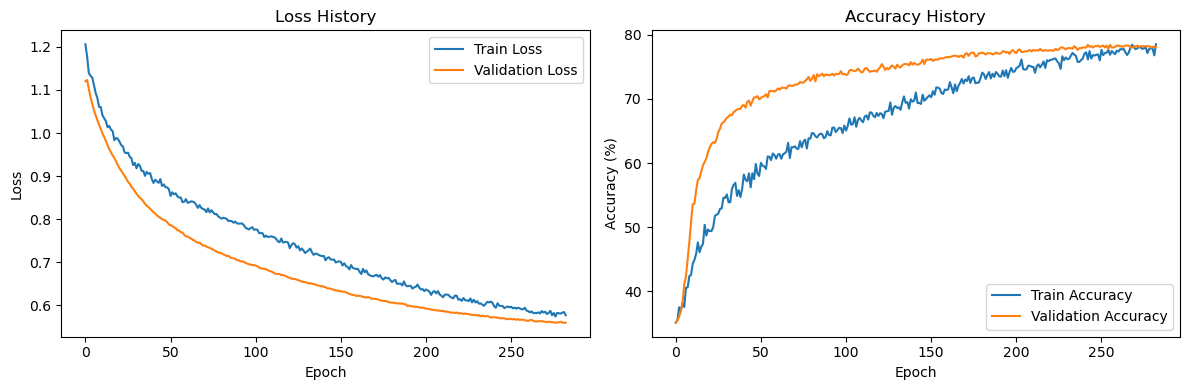

0
Early stopping at epoch 356


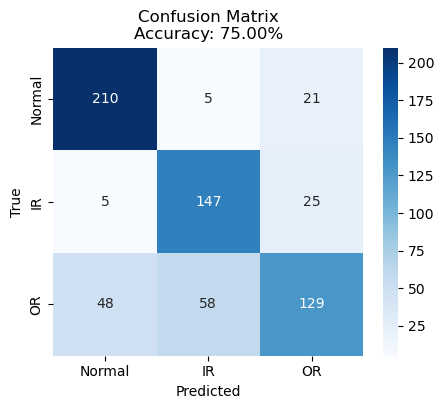

 - Model accuracy: 75.00%


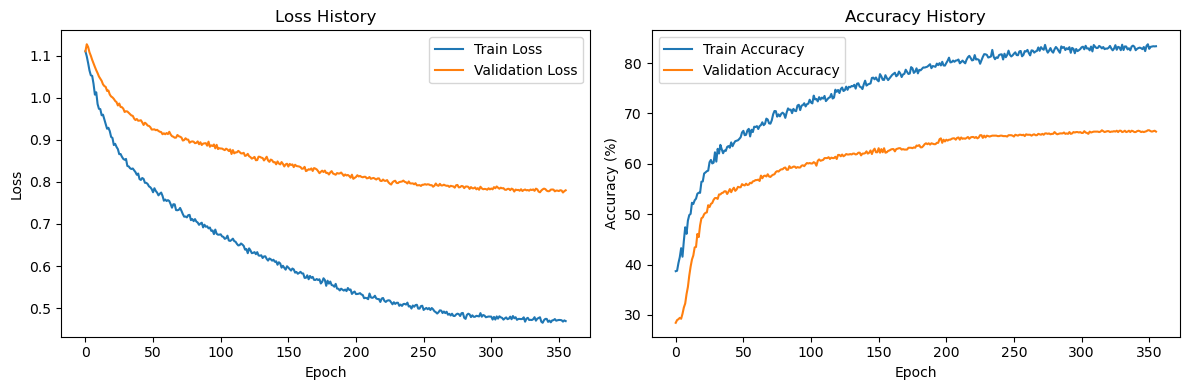

0
Early stopping at epoch 361


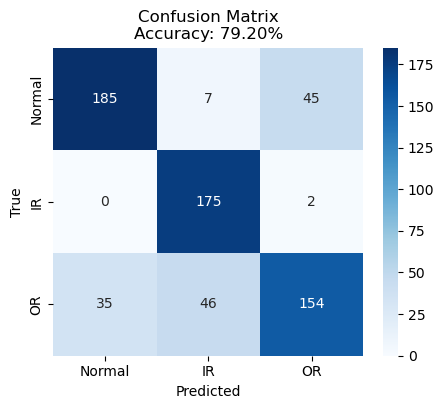

 - Model accuracy: 79.20%


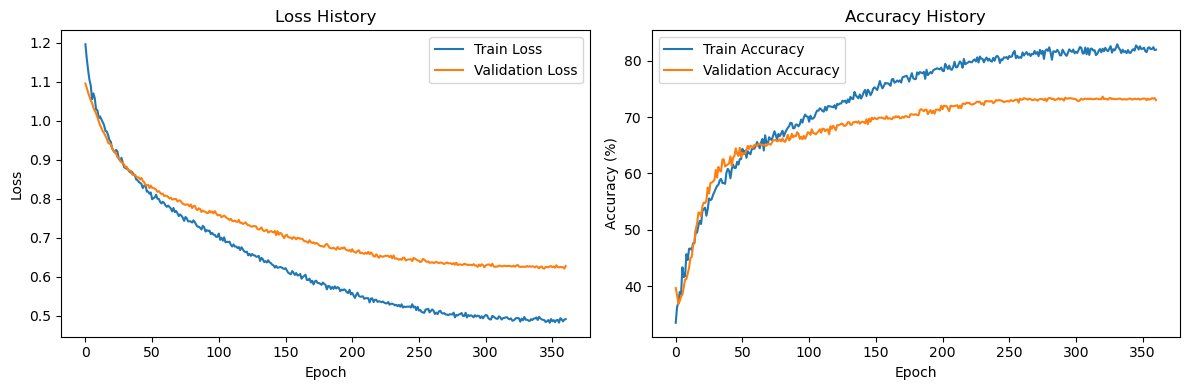

0
Early stopping at epoch 397


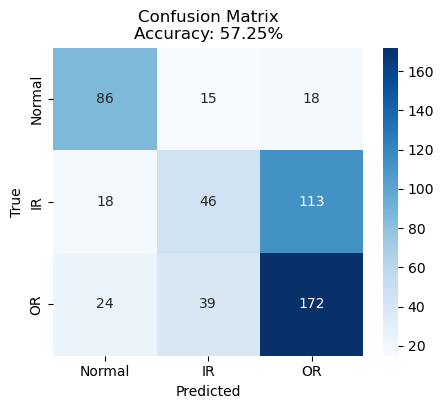

 - Model accuracy: 57.25%


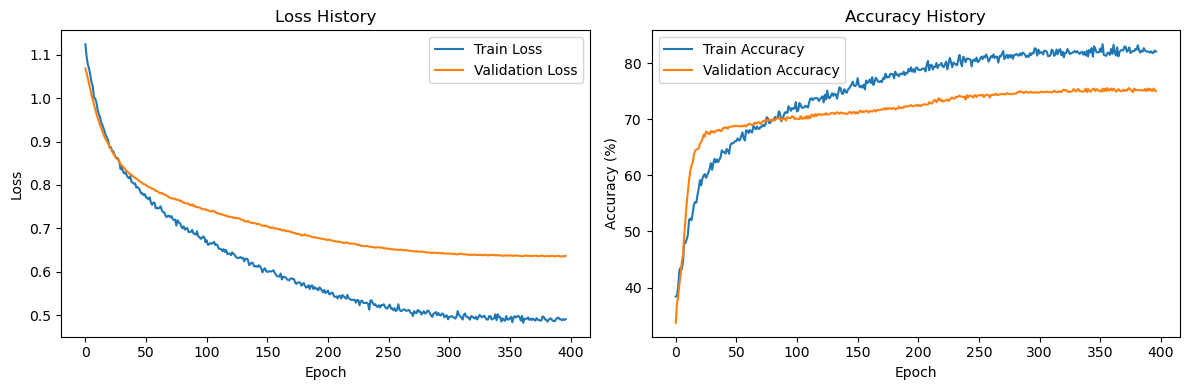

0
Early stopping at epoch 368


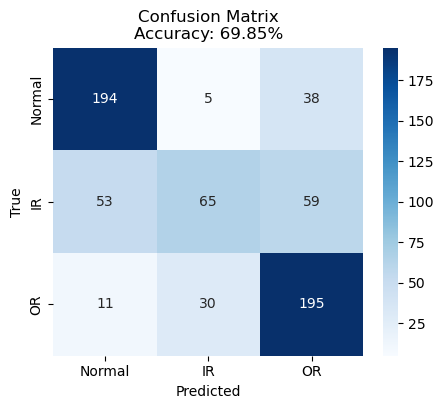

 - Model accuracy: 69.85%


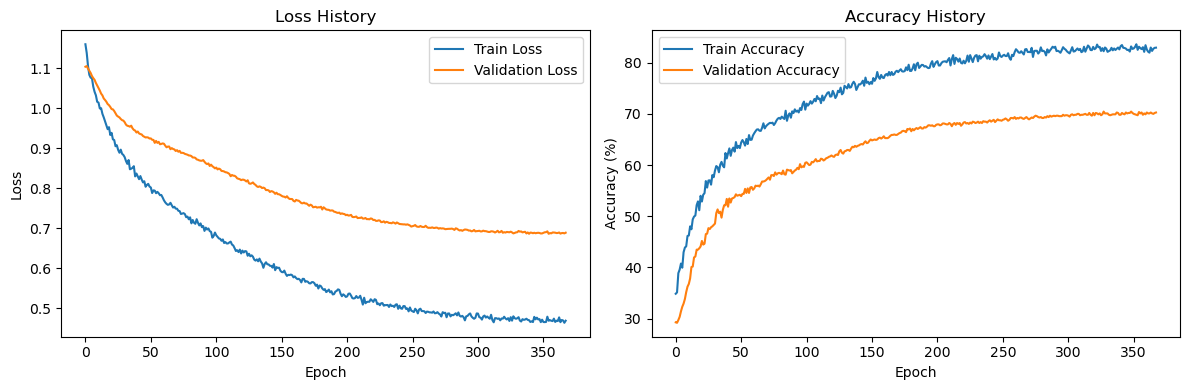

0
Early stopping at epoch 368


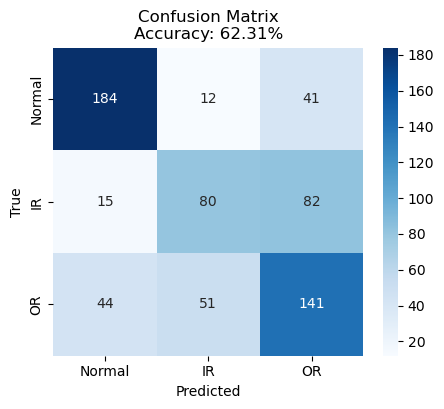

 - Model accuracy: 62.31%


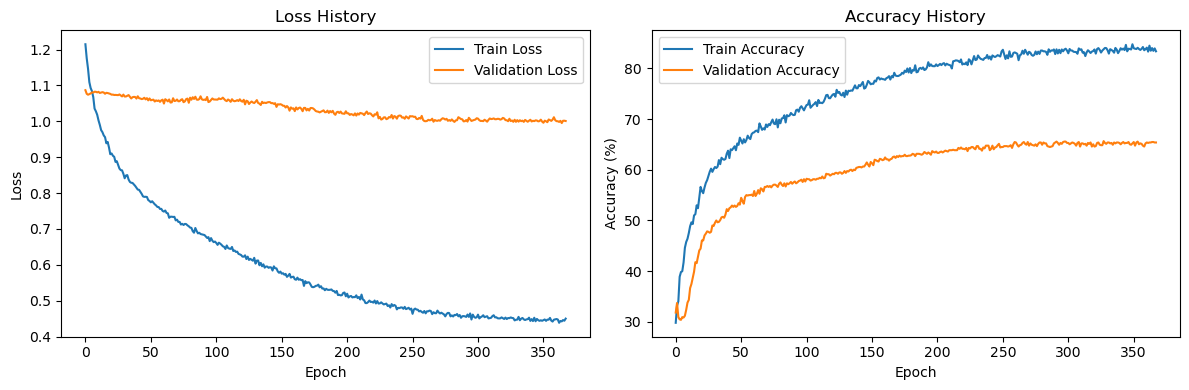

0
Early stopping at epoch 332


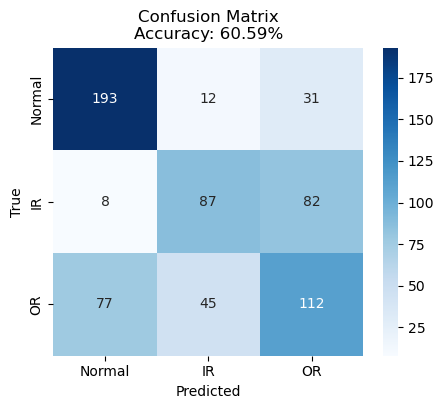

 - Model accuracy: 60.59%


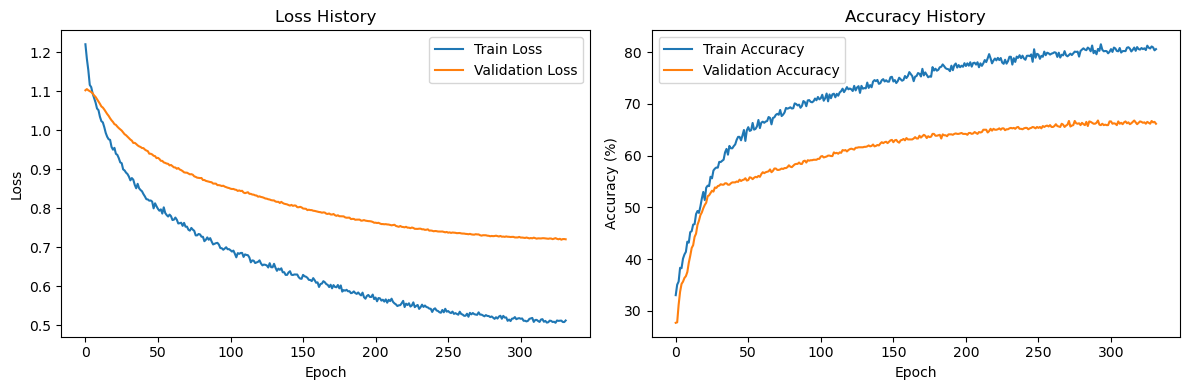

0
Early stopping at epoch 350


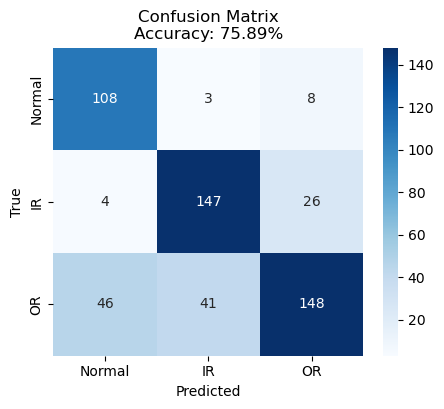

 - Model accuracy: 75.89%


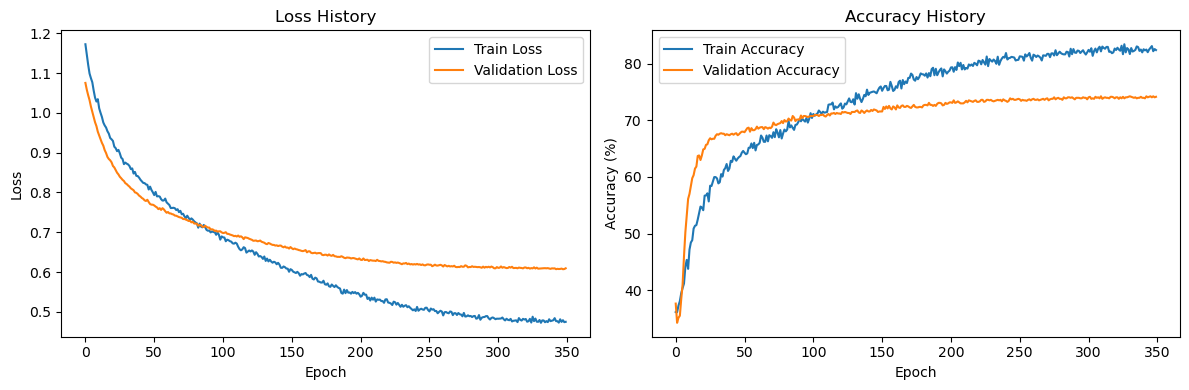

0
Early stopping at epoch 356


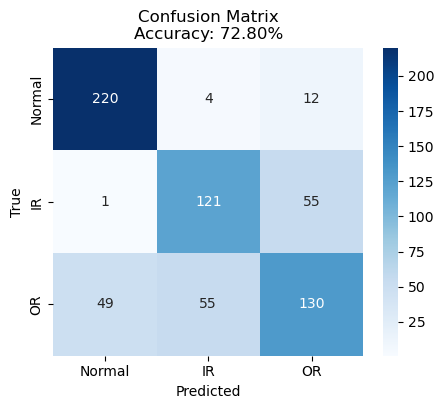

 - Model accuracy: 72.80%


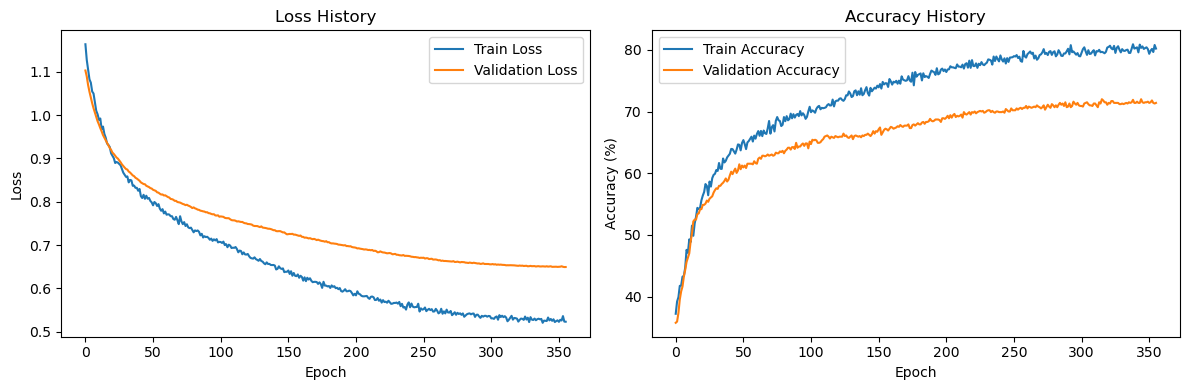

0
Early stopping at epoch 374


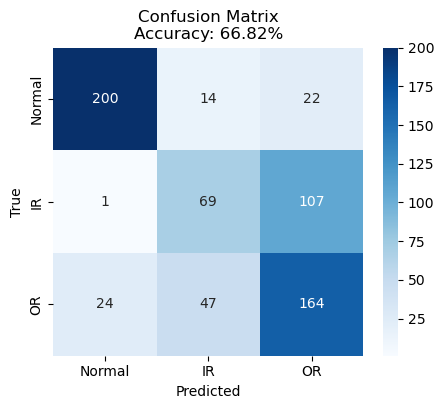

 - Model accuracy: 66.82%


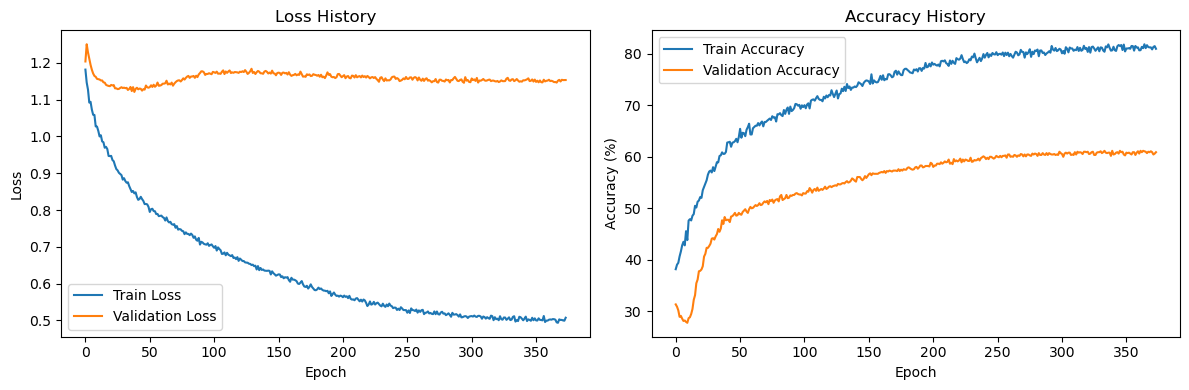

0


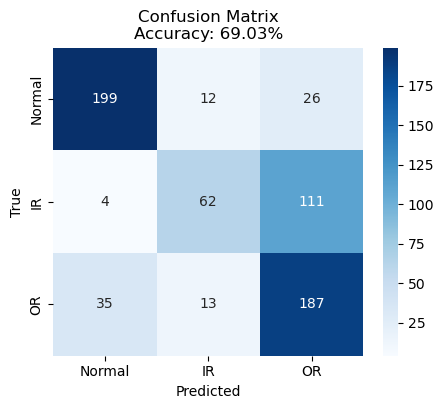

 - Model accuracy: 69.03%


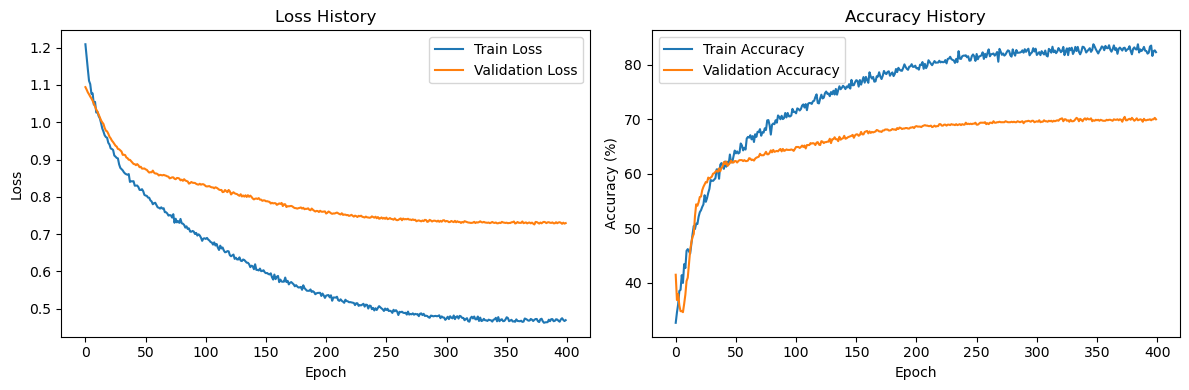

0
Early stopping at epoch 346


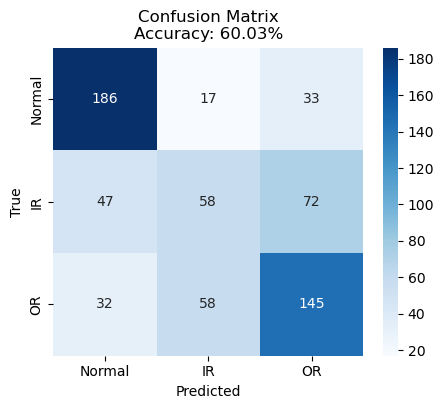

 - Model accuracy: 60.03%


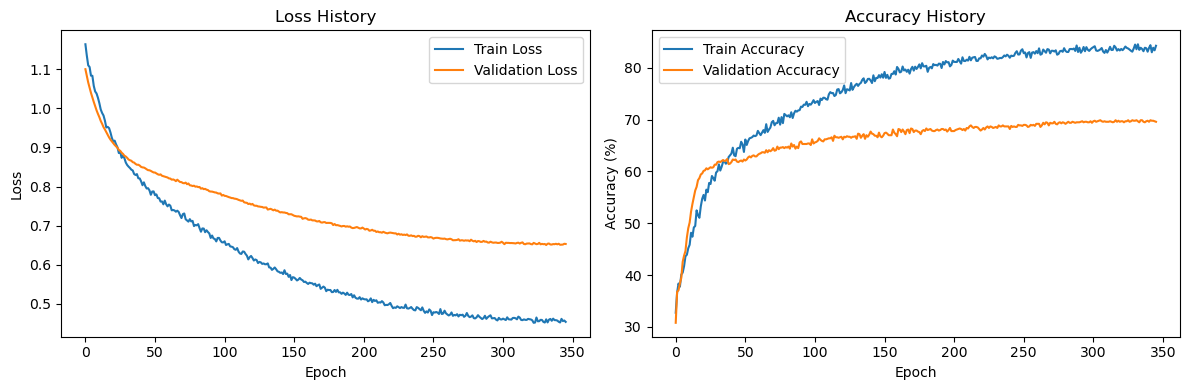

0
Early stopping at epoch 327


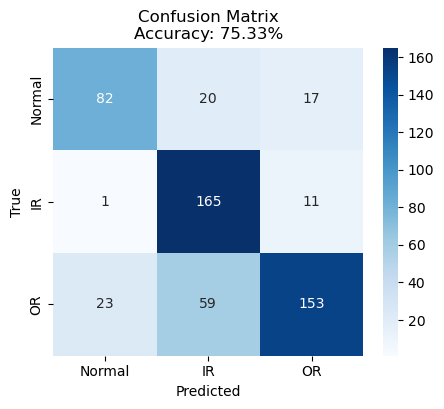

 - Model accuracy: 75.33%


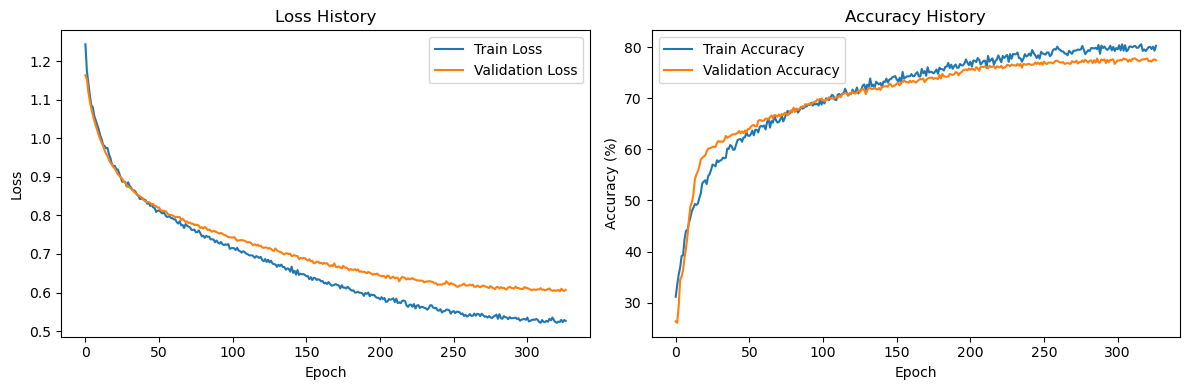

0
Early stopping at epoch 241


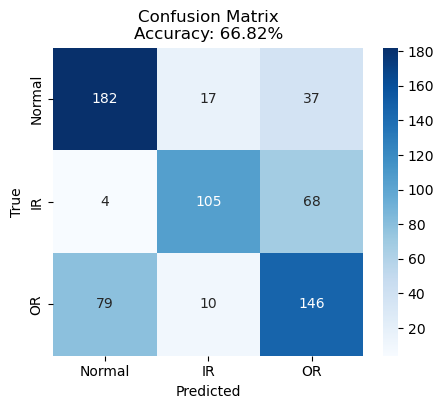

 - Model accuracy: 66.82%


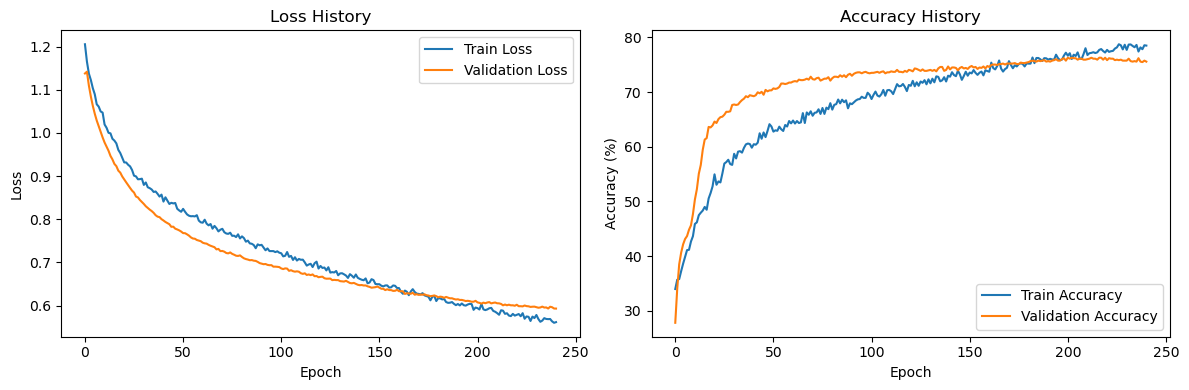

0
Early stopping at epoch 245


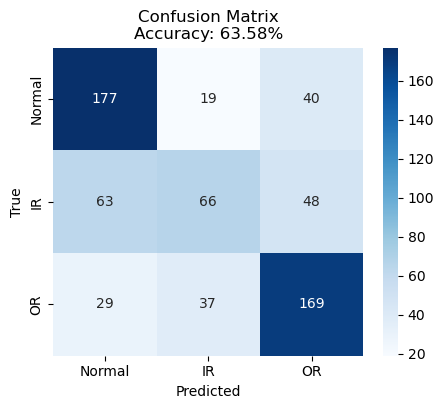

 - Model accuracy: 63.58%


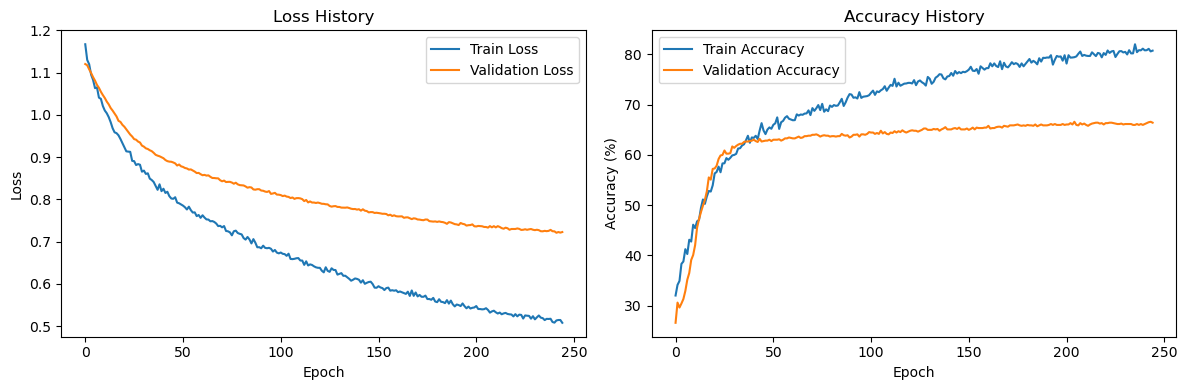

0
Early stopping at epoch 187


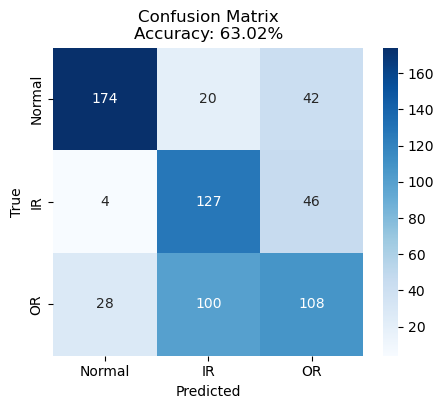

 - Model accuracy: 63.02%


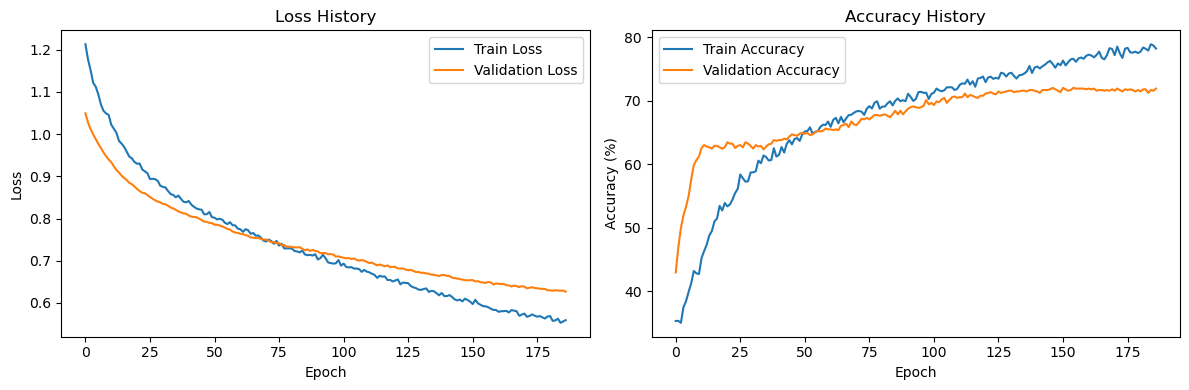

0
Early stopping at epoch 332


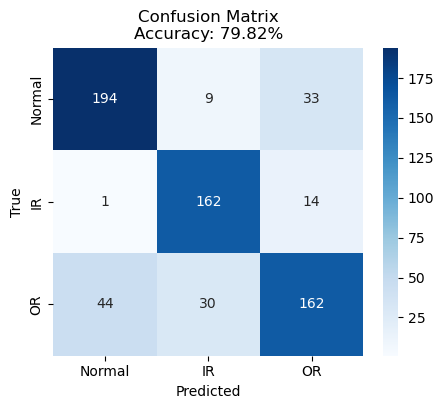

 - Model accuracy: 79.82%


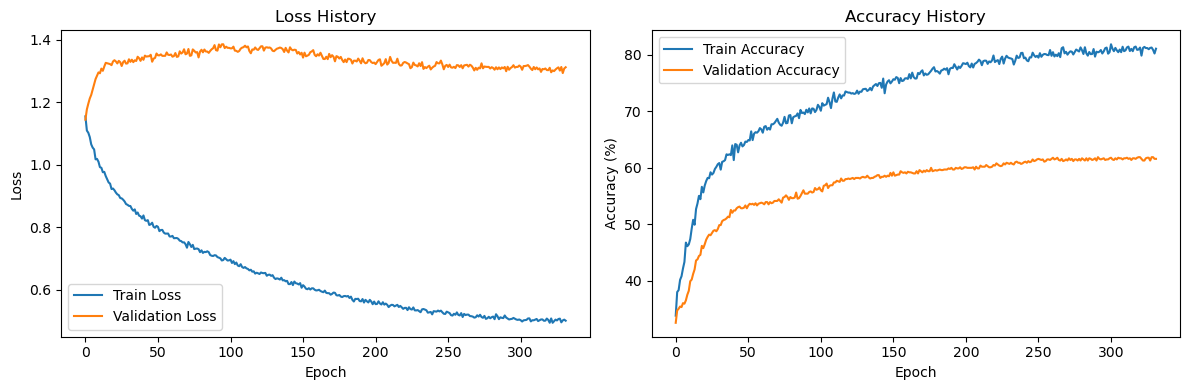

0
Early stopping at epoch 352


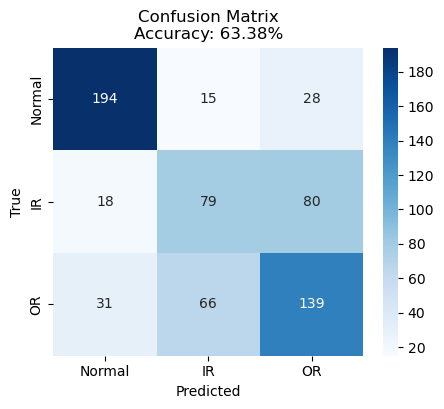

 - Model accuracy: 63.38%


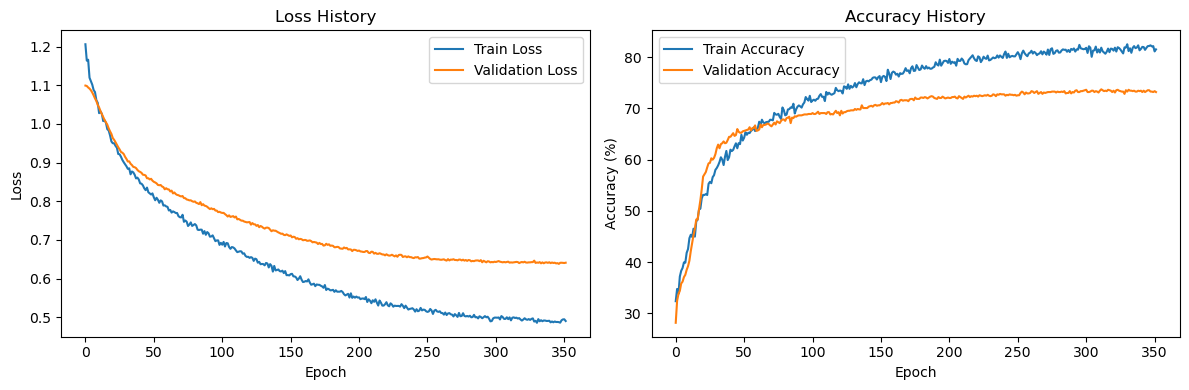

0


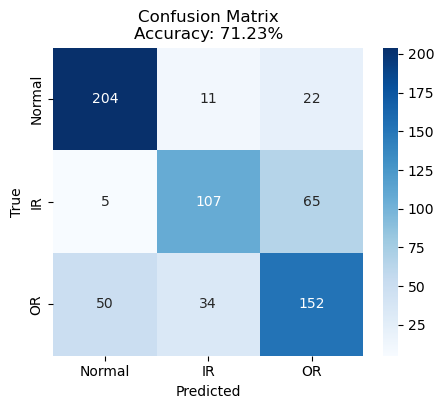

 - Model accuracy: 71.23%


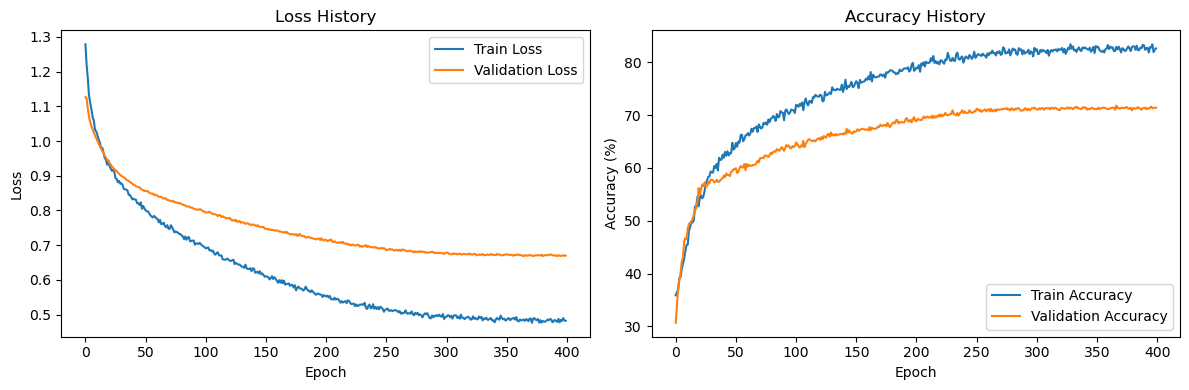

0
Early stopping at epoch 61


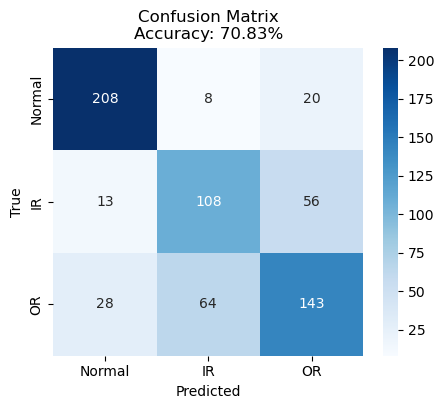

 - Model accuracy: 70.83%


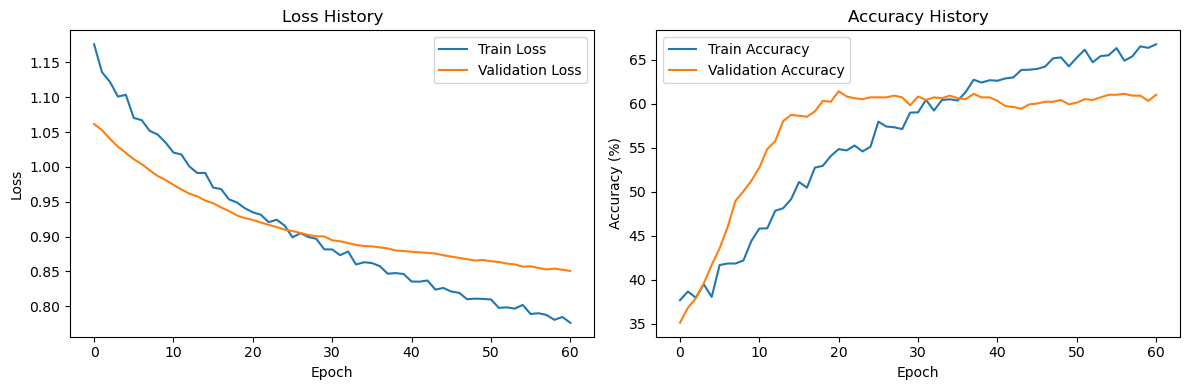

0
Early stopping at epoch 322


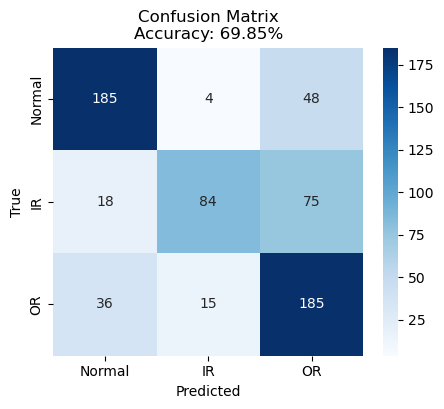

 - Model accuracy: 69.85%


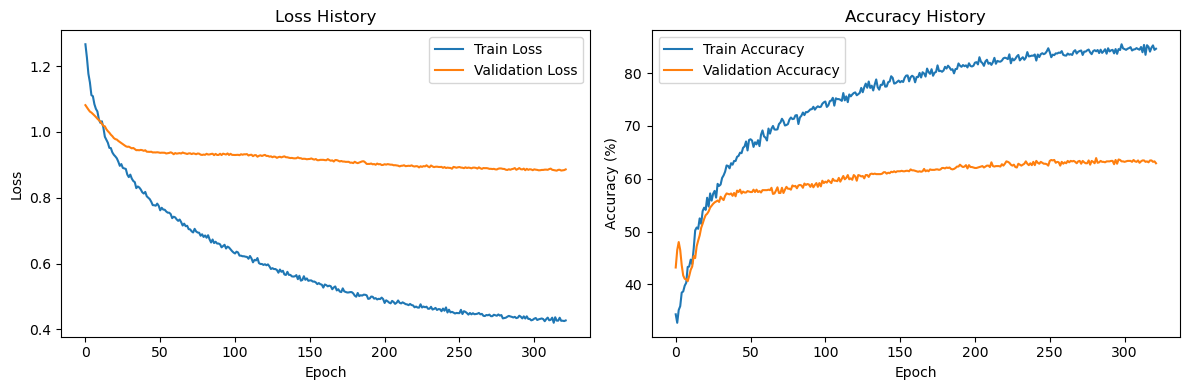

0
Early stopping at epoch 356


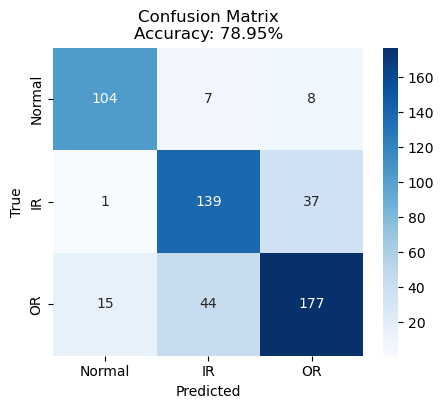

 - Model accuracy: 78.95%


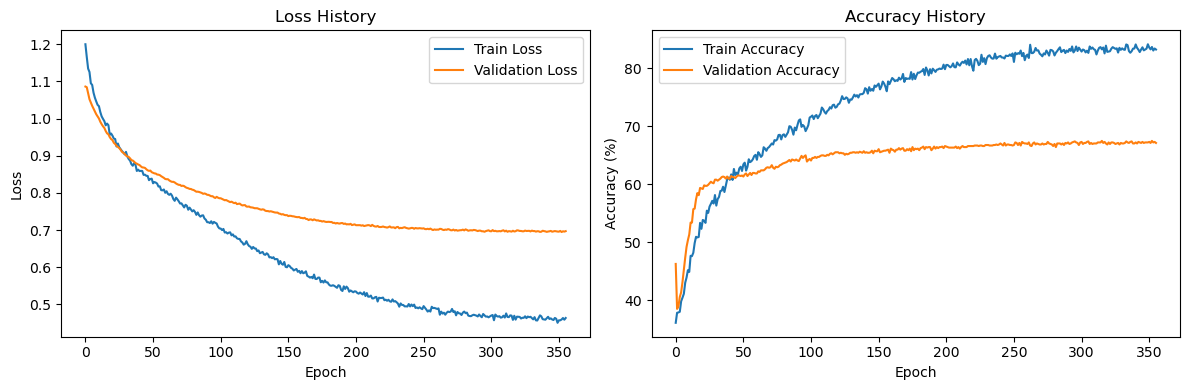

0
Early stopping at epoch 337


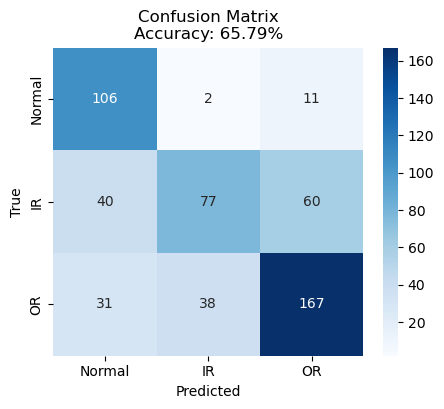

 - Model accuracy: 65.79%


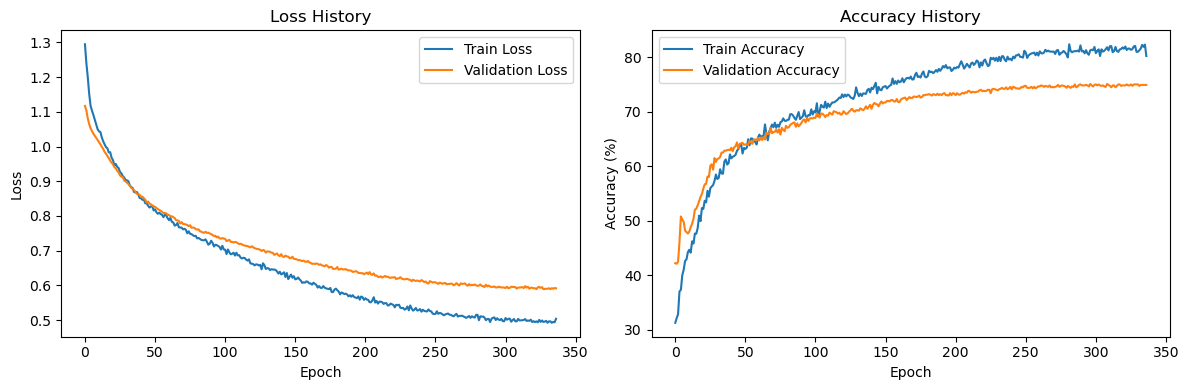

Mean accuracy: 0.6887258041391799
Std accuracy: 0.0723618443956494


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='z_score')
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))